# Flipkart Smartphones Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from selenium import webdriver
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen
import re

In [2]:
#using python's inbuilt function urlopen to open a webpage
def flipkart_urls():
    url_lists = []
    base_url = 'https://www.flipkart.com/mobiles/smartphones~type/pr?sid=tyy,4io'
    url_lists.append(base_url)
    for i in range(2, 42):
        suffix = str(i)
        url = 'https://www.flipkart.com/mobiles/smartphones~type/pr?sid=tyy%2C4io&page='
        url_flip = url + suffix
        url_lists.append(url_flip)
        
    return url_lists

url_lists = flipkart_urls()

In [3]:
def flipkart_scrapping(urls):
    name_list = []
    price_list = []
    ratings_list = []
    for url in urls:
        page = urlopen(url)
        html = page.read().decode('utf-8')
        soup = bs(html, 'html.parser')
        print(url)
        for tag in soup.find_all(name = 'div', attrs = {'class' : '_13oc-S'}):
            name = tag.find(name = 'div', attrs = {'class':'_4rR01T'})
            price = tag.find(name = 'div', attrs = {'class':'_30jeq3 _1_WHN1'})
            ratings = tag.find(name ='div', attrs = {'class':'_3LWZlK'})
            
            if price is None:
                name_val = name.string
                ratings_val = ratings.contents[0]

                name_list.append(name_val)
                price_list.append('NA')
                ratings_list.append(ratings_val)
                
                
            elif ratings is None:
                name_val = name.string
                price_val = price.string
                
                name_list.append(name_val)
                price_list.append(price_val)
                ratings_list.append('NA')
                
            else:
                name_val = name.string
                price_val = price.string
                ratings_val = ratings.contents[0]

                name_list.append(name_val)
                price_list.append(price_val)
                ratings_list.append(ratings_val)

                
            
            
    
    #name_ser = pd.Series(name_list)
    #price_ser = pd.Series(price_list)
    #ratings_ser = pd.Series(ratings_list)
    flipkart_df = pd.DataFrame({'Product Name': name_list,'Price': price_list, 'Rating': ratings_list})
    #flipkart_df.to_csv('location to save file',
     #                 index = False, encoding = 'utf-8')
    return flipkart_df

    
df_flip = flipkart_scrapping(urls = url_lists)

https://www.flipkart.com/mobiles/smartphones~type/pr?sid=tyy,4io
https://www.flipkart.com/mobiles/smartphones~type/pr?sid=tyy%2C4io&page=2
https://www.flipkart.com/mobiles/smartphones~type/pr?sid=tyy%2C4io&page=3
https://www.flipkart.com/mobiles/smartphones~type/pr?sid=tyy%2C4io&page=4
https://www.flipkart.com/mobiles/smartphones~type/pr?sid=tyy%2C4io&page=5
https://www.flipkart.com/mobiles/smartphones~type/pr?sid=tyy%2C4io&page=6
https://www.flipkart.com/mobiles/smartphones~type/pr?sid=tyy%2C4io&page=7
https://www.flipkart.com/mobiles/smartphones~type/pr?sid=tyy%2C4io&page=8
https://www.flipkart.com/mobiles/smartphones~type/pr?sid=tyy%2C4io&page=9
https://www.flipkart.com/mobiles/smartphones~type/pr?sid=tyy%2C4io&page=10
https://www.flipkart.com/mobiles/smartphones~type/pr?sid=tyy%2C4io&page=11
https://www.flipkart.com/mobiles/smartphones~type/pr?sid=tyy%2C4io&page=12
https://www.flipkart.com/mobiles/smartphones~type/pr?sid=tyy%2C4io&page=13
https://www.flipkart.com/mobiles/smartphone

In [4]:
df_flip.head()

,Product Name,Price,Rating
0,"POCO C31 (Royal Blue, 64 GB)","₹9,999",4.4
1,"realme C20 (Cool Blue, 32 GB)","₹7,499",4.4
2,"realme C20 (Cool Grey, 32 GB)","₹7,499",4.4
3,"POCO C31 (Shadow Gray, 64 GB)","₹10,049",4.4
4,"SAMSUNG Galaxy F22 (Denim Blue, 64 GB)","₹11,999",4.3


In [20]:
df_flip.shape

(960, 5)

In [5]:
def brand_price_format(df):
    listt = []
    for product in df['Product Name']:
        for item in re.finditer('([\w]*)\s(.*)', product):
            brand = item.group(1)
            listt.append(brand)

    #print(listt)
    df['Brand'] = pd.Series(listt)
    
    price_list = []
    for price in df['Price']:
        for item in re.finditer('(.{1,1})(.*)', price):
            price1 = item.group(2)
            price2 = price1.replace(',','')
            #price2 = int(price2)
            price_list.append(price2)

    #print(price_list)
    df['price_int'] = pd.Series(price_list)
    
    return df

df_flip_new = brand_price_format(df_flip)

    

In [6]:
df_flip_new.head()

,Product Name,Price,Rating,Brand,price_int
0,"POCO C31 (Royal Blue, 64 GB)","₹9,999",4.4,POCO,9999
1,"realme C20 (Cool Blue, 32 GB)","₹7,499",4.4,realme,7499
2,"realme C20 (Cool Grey, 32 GB)","₹7,499",4.4,realme,7499
3,"POCO C31 (Shadow Gray, 64 GB)","₹10,049",4.4,POCO,10049
4,"SAMSUNG Galaxy F22 (Denim Blue, 64 GB)","₹11,999",4.3,SAMSUNG,11999


In [7]:
# finding number of smartphones for each brand on flipkart
df_flip_new['Brand'].value_counts()

realme       180
SAMSUNG      102
REDMI         91
OPPO          83
Infinix       82
vivo          79
POCO          72
APPLE         70
Tecno         42
MOTOROLA      37
Redmi         34
Xiaomi        18
Itel          16
OnePlus       12
Nokia         10
LAVA           9
Micromax       4
Coolpad        3
LG             3
I              2
Moto           2
ASUS           2
Maplin         2
IQOO           1
BlackZone      1
Apple          1
Mi             1
Panasonic      1
Name: Brand, dtype: int64

In [33]:
# now some names are same like 'APPLE' and 'Apple' , 'MOTOROLA' and 'Moto' etc. so replacing them with one common name
df_flip_new.replace('Apple','APPLE', inplace = True)
df_flip_new.replace('Moto', 'MOTOROLA', inplace = True)
df_flip_new.replace('Mi','Xiaomi', inplace = True)
df_flip_new.replace('Redmi','REDMI', inplace = True)

In [34]:
df_flip_new['Brand'].value_counts()

realme       180
REDMI        125
SAMSUNG      102
OPPO          83
Infinix       82
vivo          79
POCO          72
APPLE         71
Tecno         42
MOTOROLA      39
Xiaomi        19
Itel          16
OnePlus       12
Nokia         10
LAVA           9
Micromax       4
LG             3
Coolpad        3
ASUS           2
I              2
Maplin         2
IQOO           1
BlackZone      1
Panasonic      1
Name: Brand, dtype: int64

In [35]:
# ploting bar graph for only those brands whose smartphones are more than or equal to 10
top_brands = df_flip_new['Brand'].value_counts()[df_flip_new['Brand'].value_counts() >=10]

In [53]:
top_brands

realme      180
REDMI       125
SAMSUNG     102
OPPO         83
Infinix      82
vivo         79
POCO         72
APPLE        71
Tecno        42
MOTOROLA     39
Xiaomi       19
Itel         16
OnePlus      12
Nokia        10
Name: Brand, dtype: int64

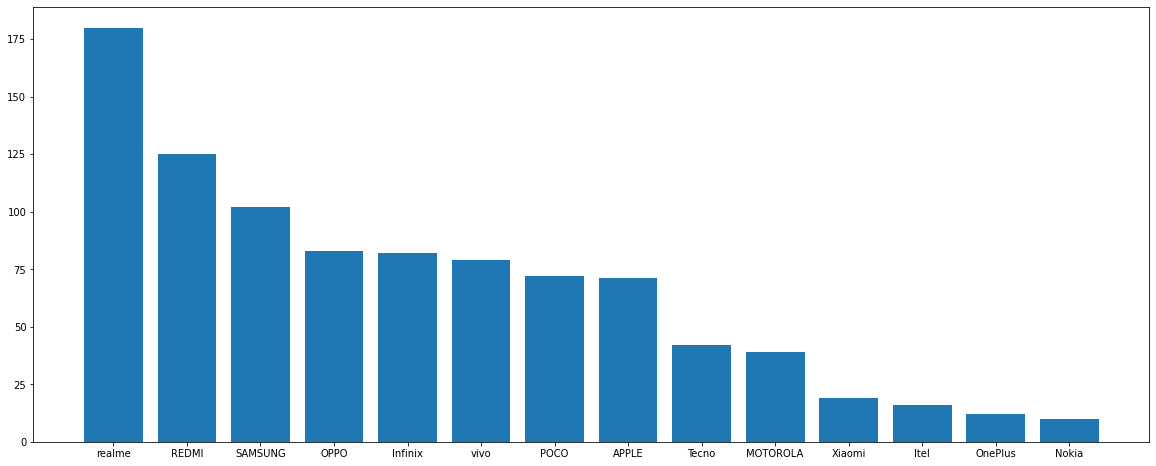

In [37]:
plt.figure(figsize = (20,8))
plt.bar(top_brands.keys(), top_brands.values)
plt.show()

In [38]:
df_flip_new['Rating'].value_counts()

4.3    322
4.4    191
4.2    168
4.1     88
4.5     58
4.6     47
4       38
3.9     19
4.7      8
3.5      5
3.3      4
3.6      3
NA       2
3.7      1
3.4      1
4.9      1
3        1
5        1
2.8      1
3.8      1
Name: Rating, dtype: int64

In [39]:
# Now, there are some missing values in prices, so removing them from dataframe for further analyis
df_flip_ana = df_flip_new[df_flip_new['price_int'] != 'A']
df_flip_ana = df_flip_ana[df_flip_ana['Rating'] != 'NA']
df_flip_ana = df_flip_ana.astype({'price_int': int, 'Rating': float})

In [40]:
df_flip_ana.dtypes

Product Name     object
Price            object
Rating          float64
Brand            object
price_int         int32
dtype: object

In [41]:
df_flip_ana.head()

,Product Name,Price,Rating,Brand,price_int
0,"POCO C31 (Royal Blue, 64 GB)","₹9,999",4.4,POCO,9999
1,"realme C20 (Cool Blue, 32 GB)","₹7,499",4.4,realme,7499
2,"realme C20 (Cool Grey, 32 GB)","₹7,499",4.4,realme,7499
3,"POCO C31 (Shadow Gray, 64 GB)","₹10,049",4.4,POCO,10049
4,"SAMSUNG Galaxy F22 (Denim Blue, 64 GB)","₹11,999",4.3,SAMSUNG,11999


In [42]:
# Comparing average ratings given to the brands
df_grp = df_flip_ana.groupby('Brand')
brand_ratings = df_grp['Rating'].agg(np.mean)

In [58]:
brand_ratings

Brand
APPLE        4.569014
ASUS         4.300000
BlackZone    3.500000
Coolpad      3.433333
I            3.150000
IQOO         4.900000
Infinix      4.309756
Itel         4.031250
LAVA         4.055556
LG           4.033333
MOTOROLA     4.123077
Maplin       3.200000
Micromax     4.075000
Nokia        3.910000
OPPO         4.320482
OnePlus      4.425000
POCO         4.275000
Panasonic    3.900000
REDMI        4.274400
SAMSUNG      4.133333
Tecno        4.188095
Xiaomi       4.200000
realme       4.362222
vivo         4.326316
Name: Rating, dtype: float64

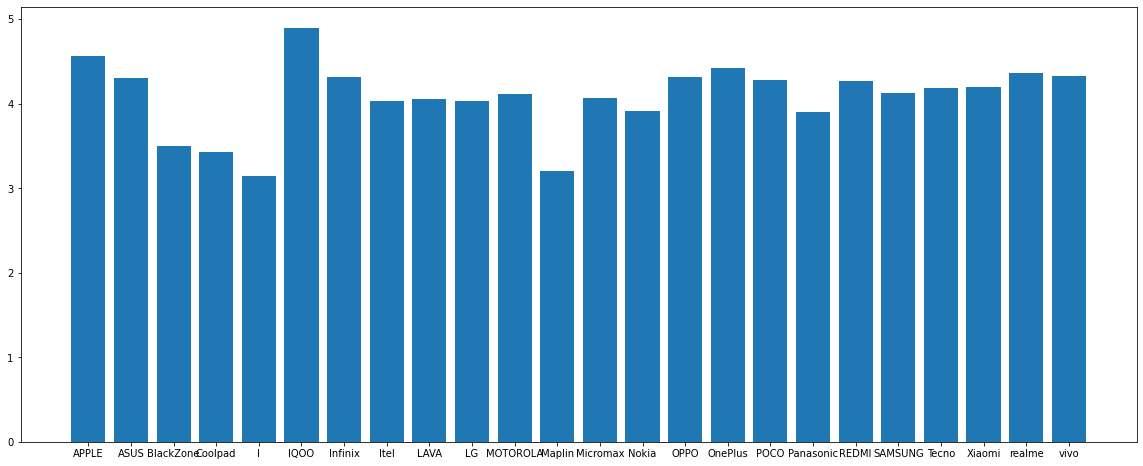

In [45]:
plt.figure(figsize = (20,8))
plt.bar(brand_ratings.keys(), brand_ratings.values.round(2))
plt.show()

In [51]:
comb = pd.merge(top_brands, brand_ratings, left_index = True, right_index = True)

In [65]:
comb['Rating'] = comb['Rating'] -3

In [67]:
comb

,Brand,Rating
realme,180,1.362222
REDMI,125,1.274400
SAMSUNG,102,1.133333
OPPO,83,1.320482
Infinix,82,1.309756
vivo,79,1.326316
POCO,72,1.275000
APPLE,71,1.569014
Tecno,42,1.188095
MOTOROLA,39,1.123077


<AxesSubplot:>

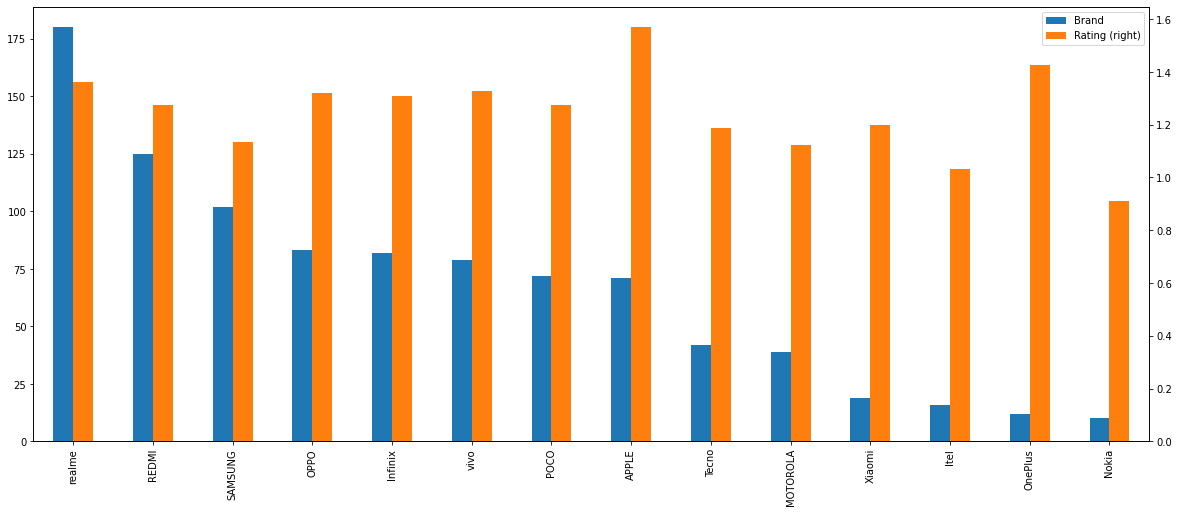

In [69]:
comb.plot(kind = 'bar', secondary_y = 'Rating', figsize = (20,8))

# Conclusion

Although realme has highest number of smartphones listed on flipkart, Apple and oneplus are highest rated smartphones on flipkart.